# Data Cleaning


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1.Load the dataset
file_path = 'data.csv'  
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
except FileNotFoundError:
    print("Data Not Found !!!!")

# 2.Handle missing values in CustomerID
data_cleaned = data.dropna(subset=['CustomerID'])

# 3.Convert InvoiceDate to datetime type
if 'InvoiceDate' in data_cleaned.columns:
    data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'], errors='coerce')

# 4.Remove rows with negative Quantity or UnitPrice
if 'Quantity' in data_cleaned.columns and 'UnitPrice' in data_cleaned.columns:
    data_cleaned = data_cleaned[(data_cleaned['Quantity'] >= 0) & (data_cleaned['UnitPrice'] >= 0)]

# 5.Create a TotalPrice column
if 'Quantity' in data_cleaned.columns and 'UnitPrice' in data_cleaned.columns:
    data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

# Save the cleaned data
output_path = 'cleaned_data.csv'
data_cleaned.to_csv(output_path, index=False)

data_cleaned.head()  


/var/folders/w_/by6jwxr56y37ngmjq894222w0000gn/T/ipykernel_6593/854376136.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'], errors='coerce')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Exploratory Data Analysis (EDA)

In [4]:
# 1. Perform a statistical summary of the dataset
stat_summary = data_cleaned.describe()

print("Statistical Summary:\n", stat_summary)

Statistical Summary:
             Quantity                    InvoiceDate      UnitPrice  \
count  397924.000000                         397924  397924.000000   
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.420210                            NaN      22.096788   

          CustomerID     TotalPrice  
count  397924.000000  397924.000000  
mean    15294.315171      22.394749  
min     12346.000000       0.000000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.169877     309.055588  


In [5]:
# 2. Identify the top 10 selling products by Quantity
top_selling_products = data_cleaned.groupby('StockCode')['Quantity'].sum().nlargest(10)

print("\nTop 10 Selling Products by Quantity:\n", top_selling_products)



Top 10 Selling Products by Quantity:
 StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64


In [6]:
# 3. Calculate total revenue and number of transactions
total_revenue = data_cleaned['TotalPrice'].sum()
number_of_transactions = data_cleaned['InvoiceNo'].nunique()

print(f"\nTotal Revenue: {total_revenue}")
print(f"Number of Transactions: {number_of_transactions}")



Total Revenue: 8911407.904
Number of Transactions: 18536


In [7]:
# 4. Check the data types of each column
column_data_types = data_cleaned.dtypes

print("\nData Types of Each Column:\n", column_data_types)



Data Types of Each Column:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
dtype: object


In [8]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned['InvoiceDate'])

Preparing the time series

In [9]:
monthly_sales = data_cleaned.groupby(data_cleaned['Date'].dt.to_period('M'))['TotalPrice'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales

Date
2010-12-01     572713.890
2011-01-01     569445.040
2011-02-01     447137.350
2011-03-01     595500.760
2011-04-01     469200.361
2011-05-01     678594.560
2011-06-01     661213.690
2011-07-01     600091.011
2011-08-01     645343.900
2011-09-01     952838.382
2011-10-01    1039318.790
2011-11-01    1161817.380
2011-12-01     518192.790
Freq: MS, Name: TotalPrice, dtype: float64

Requirment 3: Time Series Analysis

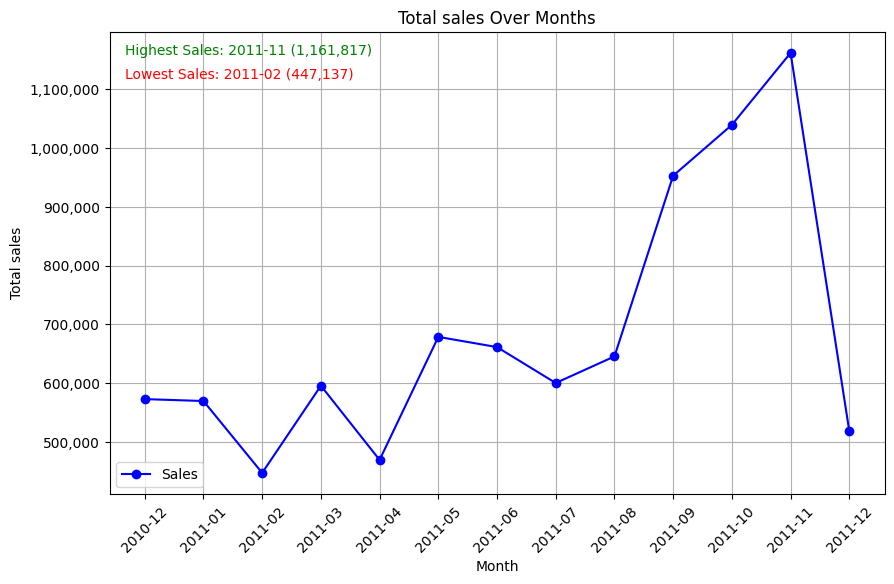

In [10]:
plt.figure(figsize=(10, 6))  
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values , marker='o', linestyle='-', color='b', label='Sales')

max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()

plt.annotate(f"Highest Sales: {max_month.strftime('%Y-%m')} ({int(monthly_sales[max_month]):,})", 
             xy=(0.02, 0.95), xycoords='axes fraction', fontsize=10, color='green')

plt.annotate(f"Lowest Sales: {min_month.strftime('%Y-%m')} ({int(monthly_sales[min_month]):,})", 
             xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10, color='red')

plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title('Total sales Over Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  
plt.show()